In [ ]:
# Import essential libraries
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import xgboost as xg

In [ ]:
# import datasets
data = pd.read_csv('TF-IDF-DF.csv')
data

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi,label_class
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
804,804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positif
805,805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif
806,806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negatif


In [ ]:
# convert values column label_class from str to int 

data.replace(to_replace ="Negatif", value = 1, inplace = True)
data.replace(to_replace ="Positif", value = 2, inplace = True)
# data.replace(to_replace ="Positive", value = 3, inplace = True)

data

,Unnamed: 0,abortion,absorb,abuse,abusing,abusive,access,accident,accommodate,according,...,year,yelling,yes,yesterday,yosua,young,younger,youth,yupi,label_class
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
804,804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
805,805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
806,806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Splite Dataset 80:20

In [ ]:
#splitting datasets
X = data.iloc[:, :-1]
y = data['label_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# converting column without decimal to integer train datasets
for col in X_train.columns:
    if np.sum((X_train[col] - X_train[col].astype('int'))) == 0:
        X_train[col] = X_train[col].astype('int')


# converting column without decimal to integer train datasets
for col in X_test.columns:
    if np.sum((X_test[col] - X_test[col].astype('int'))) == 0:
        X_test[col] = X_test[col].astype('int')

In [ ]:
# creating an array of X (Features) and y (Targets)
X_train = X_train.drop(['Unnamed: 0'], axis=1).values
y_train = y_train.values

In [ ]:
# scaling features to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782],
       [-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782],
       [-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782],
       ...,
       [-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782],
       [-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782],
       [-0.05572782, -0.03937496, -0.07306641, ..., -0.04098267,
        -0.05572782, -0.05572782]])

# Feature Selection menggunakan PSO

In [ ]:
# initial error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = svm.SVC()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

# mengubah values X_train menjadi 0 dan 1 dengan menetapkan ambang batas 0.5
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

# untuk memberikan batasan untuk setiap nilai indeks 
#tidak ada yang melebih batas bawah (0) dan batas atas (1)
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

xtrain, xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
#k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 0.3531583413935208
Iteration: 2
Best (PSO): 0.35298561953527186
Iteration: 3
Best (PSO): 0.352652087671067
Iteration: 4
Best (PSO): 0.352491277665111
Iteration: 5
Best (PSO): 0.352491277665111
Iteration: 6
Best (PSO): 0.352491277665111
Iteration: 7
Best (PSO): 0.352491277665111
Iteration: 8
Best (PSO): 0.352491277665111
Iteration: 9
Best (PSO): 0.352491277665111
Iteration: 10
Best (PSO): 0.352491277665111
Iteration: 11
Best (PSO): 0.352491277665111
Iteration: 12
Best (PSO): 0.352491277665111
Iteration: 13
Best (PSO): 0.352491277665111
Iteration: 14
Best (PSO): 0.352491277665111
Iteration: 15
Best (PSO): 0.352491277665111
Iteration: 16
Best (PSO): 0.352491277665111
Iteration: 17
Best (PSO): 0.352491277665111
Iteration: 18
Best (PSO): 0.352491277665111
Iteration: 19
Best (PSO): 0.352491277665111
Iteration: 20
Best (PSO): 0.352491277665111
Iteration: 21
Best (PSO): 0.352491277665111
Iteration: 22
Best (PSO): 0.352491277665111
Iteration: 23
Best (PSO): 0.3524912776

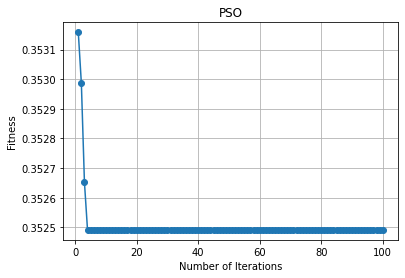

In [ ]:
# perform feature selection
start_time = time.time()
fmdl  = jfs(X_train, y_train, opts)
print("Run Time --- %s seconds ---" % (time.time() - start_time))

sf    = fmdl['sf']

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [ ]:
# menampilkan subset fitur yang terpilih
fmdl['sf']

array([   2,    3,    5,    6,   14,   15,   18,   20,   21,   22,   24,
         25,   26,   27,   28,   30,   31,   35,   39,   40,   41,   42,
         43,   48,   51,   52,   53,   55,   57,   58,   59,   63,   64,
         65,   67,   68,   73,   74,   76,   78,   80,   81,   86,   93,
         95,   96,   97,  100,  103,  104,  106,  107,  108,  109,  111,
        112,  113,  117,  118,  119,  124,  125,  130,  133,  135,  137,
        138,  141,  145,  146,  147,  148,  152,  155,  159,  162,  163,
        165,  168,  169,  171,  172,  173,  179,  180,  182,  183,  185,
        186,  187,  188,  189,  191,  193,  194,  198,  199,  200,  203,
        214,  215,  216,  218,  219,  220,  221,  228,  229,  233,  234,
        243,  244,  247,  248,  249,  255,  256,  257,  259,  260,  261,
        262,  265,  268,  272,  273,  278,  279,  281,  285,  287,  288,
        289,  290,  291,  292,  294,  296,  297,  301,  302,  303,  304,
        308,  313,  315,  317,  322,  325,  328,  3

# Klasifikasi menggunakan SVM

In [ ]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

#klasifikasi data training
mdl       = svm.SVC()
mdl.fit(x_train, y_train)
#klasifikasi data testing
y_pred    = mdl.predict(x_valid)

# accuracy
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)
print("Accuracy Score : ", accuracy_score(y_valid, y_pred))
print("Precision Score : ", precision_score(y_valid, y_pred))
print("Recall Score : ", recall_score(y_valid, y_pred))
# print("F-1 Score : ", f1_score(y_valid, y_pred))

RMSE: 0.3517262290563295
Accuracy Score :  0.8762886597938144
Precision Score :  0.8723404255319149
Recall Score :  1.0


# Evaluasi Model Klasifikasi menggunakan Confusion Matrix

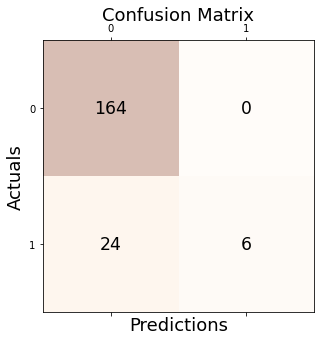

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_true=y_valid, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
